In [43]:
%matplotlib inline
import os
import glob
import pickle
import datetime
import warnings
import traceback

import tqdm
import dask
import dask.bag as db
import netCDF4
import scipy.interpolate
import numpy as np
import matplotlib.pyplot as pl

from dask.diagnostics import ProgressBar

warnings.simplefilter('ignore')

In [44]:
def griddata(r, azi, refl):
    rv = np.arange(500, 20e3, 250)
    aziv = np.arange(0, 360, 1)
    RV, AV = np.meshgrid(rv, aziv)
    R, A = np.meshgrid(r[r<20e3], azi)
    
    reflv = scipy.interpolate.griddata((R.flatten(), A.flatten()), refl.flatten(), (RV.flatten(), AV.flatten()) )
    return reflv.reshape(RV.shape)

In [49]:
def read_netcdf(infile):
    with netCDF4.Dataset(infile) as ncid:
        r = ncid['range'][:].filled(np.NaN)
        st = ncid['sweep_start_ray_index'][0]
        ed = ncid['sweep_end_ray_index'][0]
        sl = slice(st, ed)
        azi = ncid['azimuth'][sl].filled(np.NaN)
        
        refl = np.squeeze(ncid['DBZ'][sl, r < 20e3]).filled(np.NaN)
        
    try:
        return griddata(r, azi, refl)
    except Exception:
        return None

In [50]:
def process_flist(flist, cluttermap):
    dblist = db.from_sequence(flist)
    dbobj = dblist.map(read_netcdf)
    with ProgressBar():
        rslt = dbobj.compute()

    rslt = [r for r in rslt if r is not None]

    dbz2 = np.zeros((len(rslt), np.sum(cluttermap == 1)))        
    for i in range(len(rslt)):
        dbz2[i, :] = rslt[i][cluttermap == 1]        
    
    return dbz2

In [51]:
with open('cmask_new.pkl', 'rb') as fid:
    cmasks = pickle.load(fid)

In [52]:
flist_1998 = sorted(glob.glob('/g/data2/rr5/CPOL_radar/CPOL_level_1a/1998/1998121*/*.nc'))
dbz_1998 = process_flist(flist_1998, cmasks['1998'])

[########################################] | 100% Completed | 27.1s


In [55]:
flist_2006 = sorted(glob.glob('/g/data2/rr5/CPOL_radar/CPOL_level_1a/2006/2006010*/*.nc'))
dbz_2006 = process_flist(flist_2006, cmasks['2006'])

[########################################] | 100% Completed | 32.7s


In [56]:
flist_2013 = sorted(glob.glob('/g/data2/rr5/CPOL_radar/CPOL_level_1a/2013/2013010*/*.nc'))
dbz_2013 = process_flist(flist_2013, cmasks['2013'])

[########################################] | 100% Completed | 18.5s


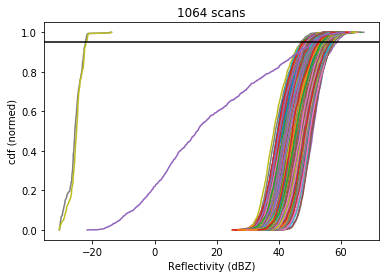

In [67]:
for i in range(dbz_1998.shape[0]):
    sorted_data = np.sort(dbz_1998[i, :])
    sorted_data = sorted_data[~np.isnan(sorted_data)]
    yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
    pl.plot(sorted_data, yvals)

pl.xlabel('Reflectivity (dBZ)')
pl.ylabel('cdf (normed)')
pl.axhline(0.95, color='k')
pl.title(f'{i} scans')
pl.show()

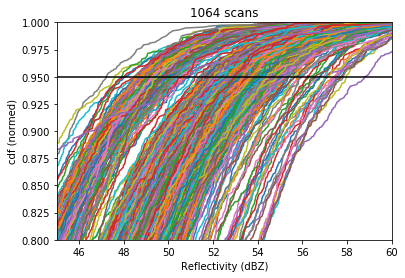

In [68]:
for i in range(dbz_1998.shape[0]):
    sorted_data = np.sort(dbz_1998[i, :])
    sorted_data = sorted_data[~np.isnan(sorted_data)]
    yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
    pl.plot(sorted_data, yvals)

pl.xlabel('Reflectivity (dBZ)')
pl.ylabel('cdf (normed)')
pl.axhline(0.95, color='k')
pl.axis((45, 60, 0.8, 1))
pl.title(f'{i} scans')
pl.show()

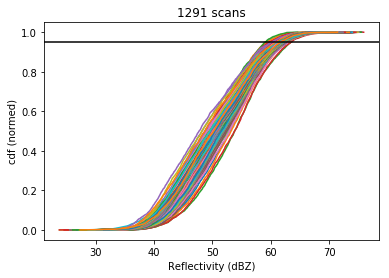

In [69]:
for i in range(dbz_2006.shape[0]):
    sorted_data = np.sort(dbz_2006[i, :])
    sorted_data = sorted_data[~np.isnan(sorted_data)]
    yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
    pl.plot(sorted_data, yvals)

pl.xlabel('Reflectivity (dBZ)')
pl.ylabel('cdf (normed)')
pl.axhline(0.95, color='k')
pl.title(f'{i} scans')
pl.show()

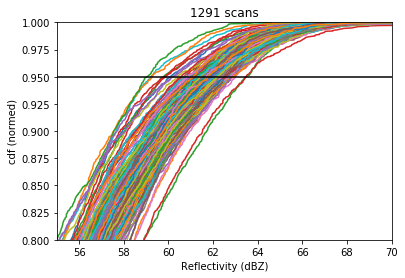

In [70]:
for i in range(dbz_2006.shape[0]):
    sorted_data = np.sort(dbz_2006[i, :])
    sorted_data = sorted_data[~np.isnan(sorted_data)]
    yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
    pl.plot(sorted_data, yvals)

pl.xlabel('Reflectivity (dBZ)')
pl.ylabel('cdf (normed)')
pl.axhline(0.95, color='k')
pl.axis((55, 70, 0.8, 1))
pl.title(f'{i} scans')
pl.show()

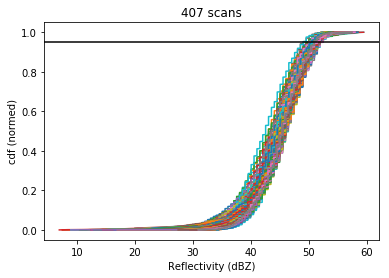

In [71]:
for i in range(dbz_2013.shape[0]):
    sorted_data = np.sort(dbz_2013[i, :])
    sorted_data = sorted_data[~np.isnan(sorted_data)]
    yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
    pl.plot(sorted_data, yvals)

pl.xlabel('Reflectivity (dBZ)')
pl.ylabel('cdf (normed)')
pl.axhline(0.95, color='k')
pl.title(f'{i} scans')
pl.show()

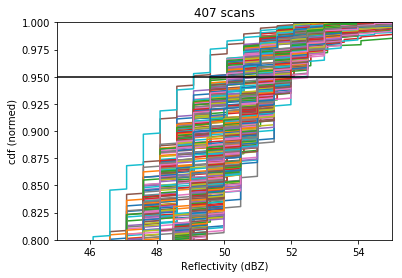

In [72]:
for i in range(dbz_2013.shape[0]):
    sorted_data = np.sort(dbz_2013[i, :])
    sorted_data = sorted_data[~np.isnan(sorted_data)]
    yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
    pl.plot(sorted_data, yvals)

pl.xlabel('Reflectivity (dBZ)')
pl.ylabel('cdf (normed)')
pl.axhline(0.95, color='k')
pl.axis((45, 55, 0.8, 1))
pl.title(f'{i} scans')
pl.show()

In [73]:
x = np.array([])
y = np.array([])
for i in range(dbz_2006.shape[0]):
    sorted_data = np.sort(dbz_2006[i, :])
    sorted_data = sorted_data[~np.isnan(sorted_data)]
    yvals = np.arange(len(sorted_data)) / float(len(sorted_data)-1)
    x = np.append(x, sorted_data)
    
    y = np.append(y, yvals)

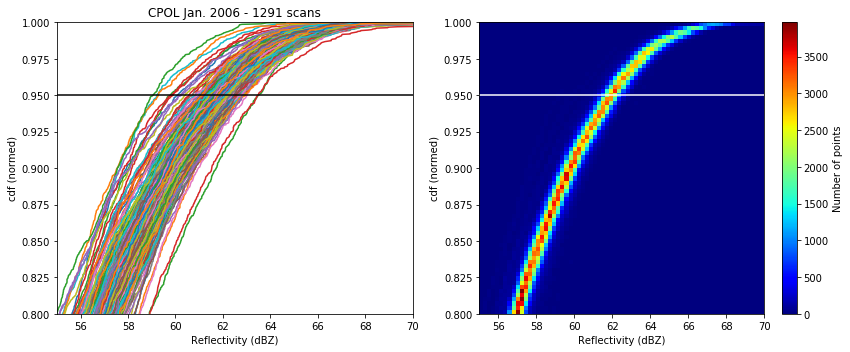

In [91]:
fig = pl.figure(figsize=(12, 5))
pl.subplot(1, 2, 1)
for i in range(dbz_2006.shape[0]):
    sorted_data = np.sort(dbz_2006[i, :])
    sorted_data = sorted_data[~np.isnan(sorted_data)]
    yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
    pl.plot(sorted_data, yvals)

pl.xlabel('Reflectivity (dBZ)')
pl.ylabel('cdf (normed)')
pl.axhline(0.95, color='k')
pl.axis((55, 70, 0.8, 1))
pl.title(f'CPOL Jan. 2006 - {i} scans')

pl.subplot(1, 2, 2)
pl.hist2d(x, y, range=[[55, 70], [0.8, 1]], bins=70, cmap='jet')
cbar = pl.colorbar()
cbar.set_label('Number of points')
pl.xlabel('Reflectivity (dBZ)')
pl.ylabel('cdf (normed)')
pl.axhline(0.95, color='w')

fig.tight_layout()
pl.savefig('CDF_CPOL_2006.png', dpi=150)

In [81]:
x_2013 = np.array([])
y_2013 = np.array([])
for i in range(dbz_2013.shape[0]):
    sorted_data = np.sort(dbz_2013[i, :])
    sorted_data = sorted_data[~np.isnan(sorted_data)]
    yvals = np.arange(len(sorted_data)) / float(len(sorted_data)-1)
    x_2013 = np.append(x_2013, sorted_data)
    y_2013 = np.append(y_2013, yvals)

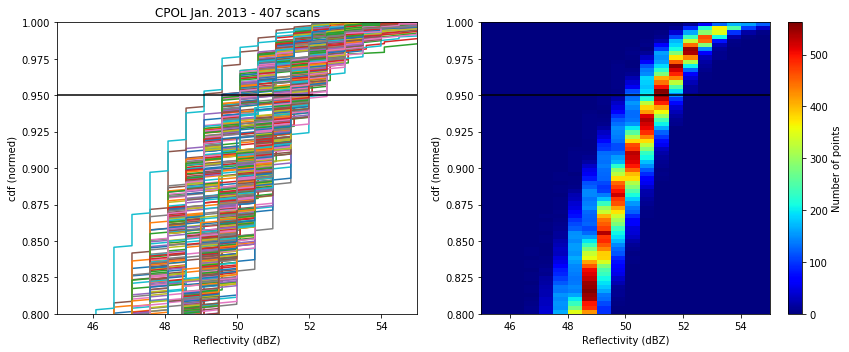

In [92]:
fig = pl.figure(figsize=(12, 5))
pl.subplot(1, 2, 1)
for i in range(dbz_2013.shape[0]):
    sorted_data = np.sort(dbz_2013[i, :])
    sorted_data = sorted_data[~np.isnan(sorted_data)]
    yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
    pl.plot(sorted_data, yvals)

pl.xlabel('Reflectivity (dBZ)')
pl.ylabel('cdf (normed)')
pl.axhline(0.95, color='k')
pl.axis((45, 55, 0.8, 1))
pl.title(f'CPOL Jan. 2013 - {i} scans')

pl.subplot(1, 2, 2)
pl.hist2d(x_2013, y_2013, range=[[45, 55], [0.8, 1]], bins=[20, 70], cmap='jet')
cbar = pl.colorbar()
cbar.set_label('Number of points')
pl.xlabel('Reflectivity (dBZ)')
pl.ylabel('cdf (normed)')
pl.axhline(0.95, color='k')

fig.tight_layout()
pl.savefig('CDF_CPOL_2013.png', dpi=150)

In [107]:
np.std(np.percentile(dbz_2006, 95, axis=1))

0.3767329572404161